In [7]:
# All imports
from chem_sim_search.similarity import score_similarity, sdf_to_smiles
from time import perf_counter
from rdkit.Chem.Draw import SimilarityMaps
from rdkit import Chem

In [2]:
# This is a simple demonstration to show scoring two molecules.

# This is paracetamol (Acetaminophen).
molecule_1 = "CC(=O)NC1=CC=C(C=C1)O"
# This is a paracetamol derivative (3',5'-Dimethylacetaminophen).
molecule_2 = "CC1=CC(=CC(=C1O)C)NC(=O)C"

# Run similarity scoring between both these drugs
score = score_similarity(molecule_1, molecule_2)
print(score)

0.71875


In [3]:
# Load the SDF file drug library of 9352 epigenetic drugs.
sdf_data = "./data/epigenetics_library.sdf"

results = sdf_to_smiles(sdf_data)

print(len(results))

print(type(results[1]))

9352
<class 'str'>


In [5]:
# The query drug is a specific inhibitor of EHMT2/G9a.
# Perform a similarity search of this drug against the Enamine epignetics drug library.

start_time = perf_counter()

query_drug = "CC(C)N1CCC(CC1)NC2=NC(=NC3=CC(=C(C=C32)OC)OCCCN4CCCC4)N5CCC(CC5)(F)F"

similarity_scores = []

for smiles in results:
    similarity_score = score_similarity(query_drug, smiles)
    similarity_scores.append(similarity_score)


end_time = perf_counter()

print(f"Time take is {end_time-start_time} seconds.")

Time take is 11.202823499999994 seconds.


In [9]:
start_time = perf_counter()

max_Score = max(similarity_scores)
print(max_Score)

max_index = similarity_scores.index(max_Score)
print(max_index)

print(results[max_index])

0.5291005291005291
3500
Cc1sc2nc(CN3CCC(C)CC3)nc(NC3CCC(O)CC3)c2c1C


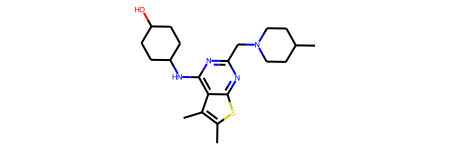

In [12]:
mol

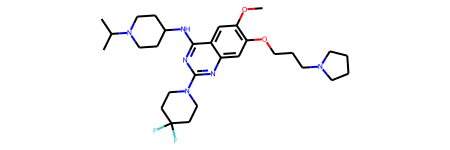

In [13]:
refmol

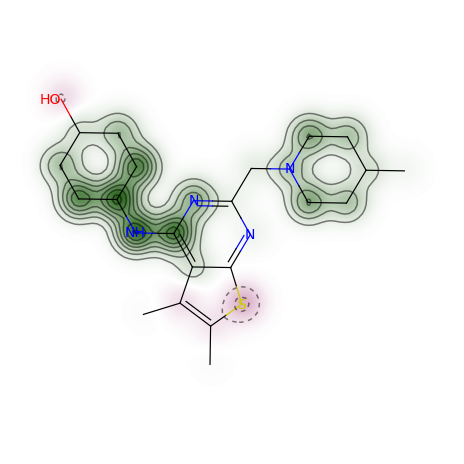

In [11]:
refmol = Chem.MolFromSmiles(query_drug)
mol = Chem.MolFromSmiles(results[max_index])

fig, maxweight = SimilarityMaps.GetSimilarityMapForFingerprint(refmol, mol, SimilarityMaps.GetMorganFingerprint)